In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
iris = load_iris()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


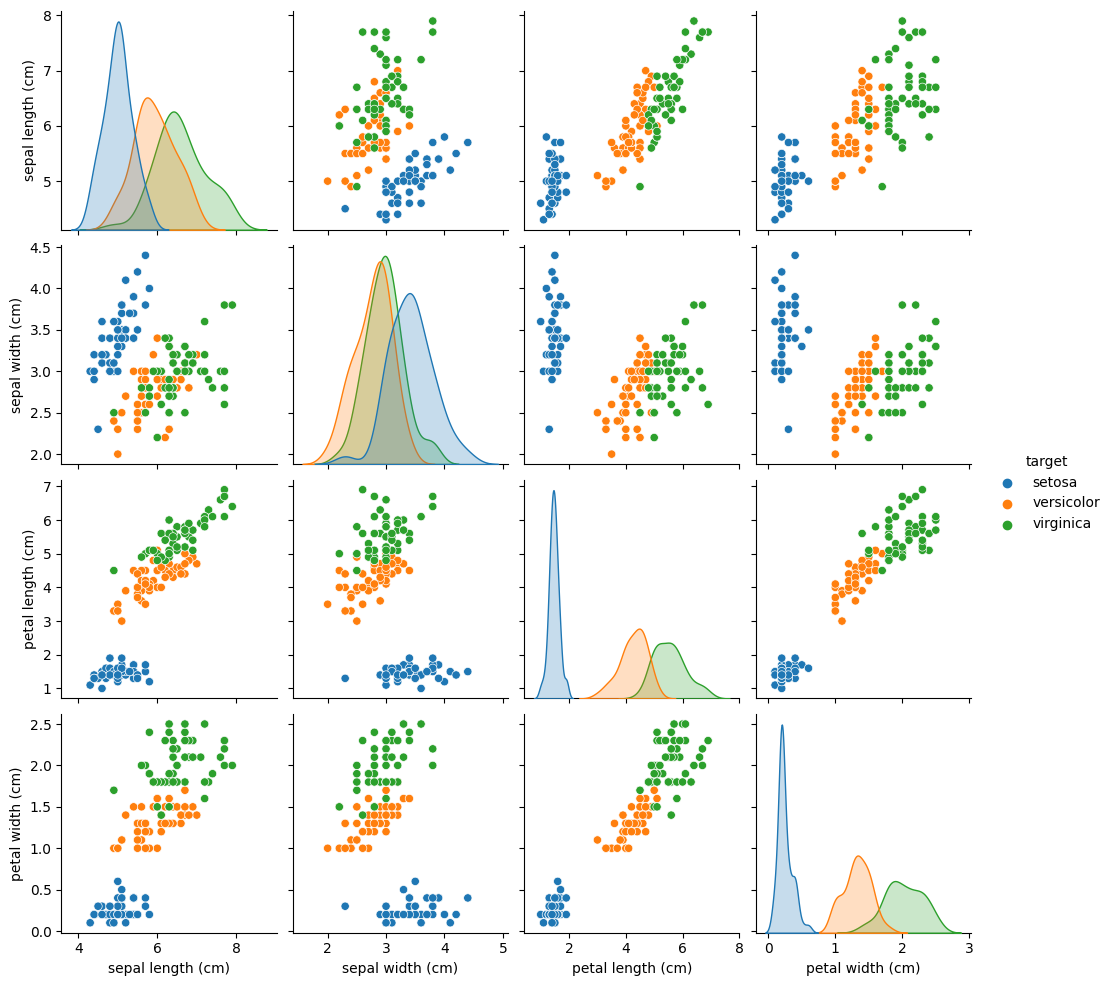

In [14]:
df_iris = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df_iris['target'] = pd.Series([iris['target_names'][iris['target'][i]] for i in range(150)])
sns.pairplot( data=df_iris, vars=('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'), hue='target')
df_iris.describe()


In [15]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, 3), random_state=1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [17]:
print('Relatório:\n',classification_report(y_test,prediction))
print("\nMatriz de confusão detalhada:\n",
      pd.crosstab(y_test, prediction, rownames=['Real'], colnames=['Predito'],
margins=True, margins_name='Todos'))

Relatório:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38


Matriz de confusão detalhada:
 Predito   0  1   2  Todos
Real                     
0        16  0   0     16
1         0  9   1     10
2         0  0  12     12
Todos    16  9  13     38


exemplo regressão

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('house_prices.csv')


In [22]:
df = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
df


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287


In [23]:
x = df.drop('price', axis=1)
y = df['price']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [24]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),activation = 'relu', solver = 'adam')
mlp_reg.fit(trainX_scaled, trainY)
y_pred = mlp_reg.predict(testX_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


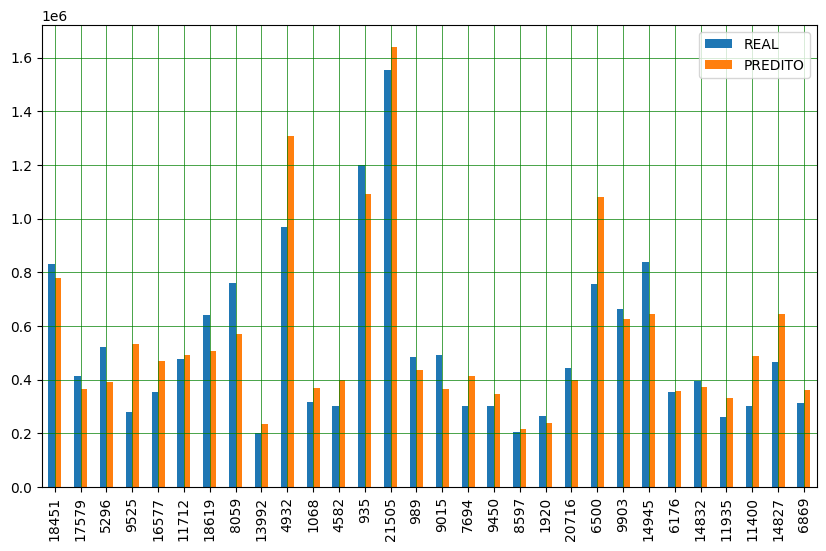

In [27]:
df_temp = pd.DataFrame({'REAL': testY, 'PREDITO': y_pred})
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 136077.65679504536
Mean Squared Error: 46513056794.44771
Root Mean Squared Error: 215668.85912075418
